# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [30]:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [31]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [32]:
sensor.isna().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [33]:
sensor.shape
# 12 cols & 1751 rows

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [34]:
dates = pd.date_range("1/1/2018 00:00:00", "1/1/2018 00:29:10", periods=sensor.shape[0])
dates

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [35]:
sensor.index = dates
sensor.sample()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:19:01,1.380054,-0.507567,0.156848,0.85808,0.486052,-0.165686,0.314249,0.32827,0.457296,0.425032,0.793458,0.549811


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

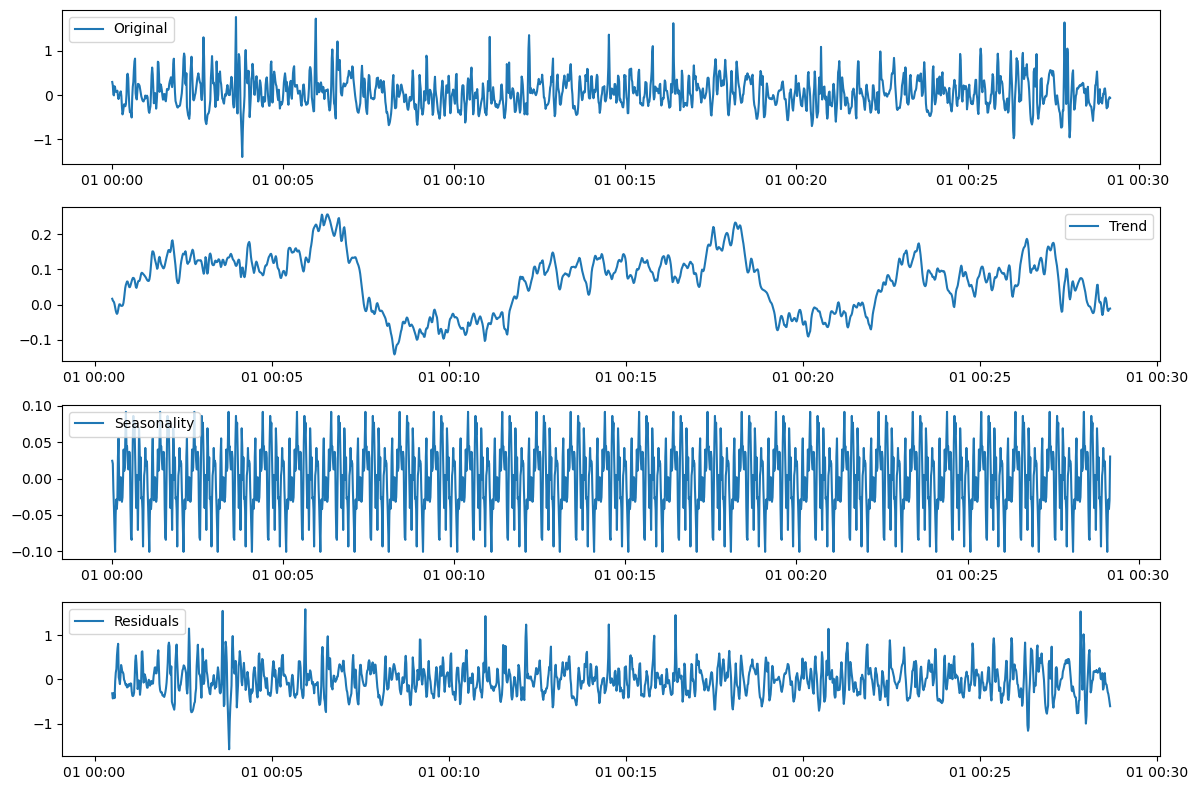

In [37]:
decomposition = seasonal_decompose(sensor['userAcceleration.x'], model='additive', period=60)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sensor['userAcceleration.x'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

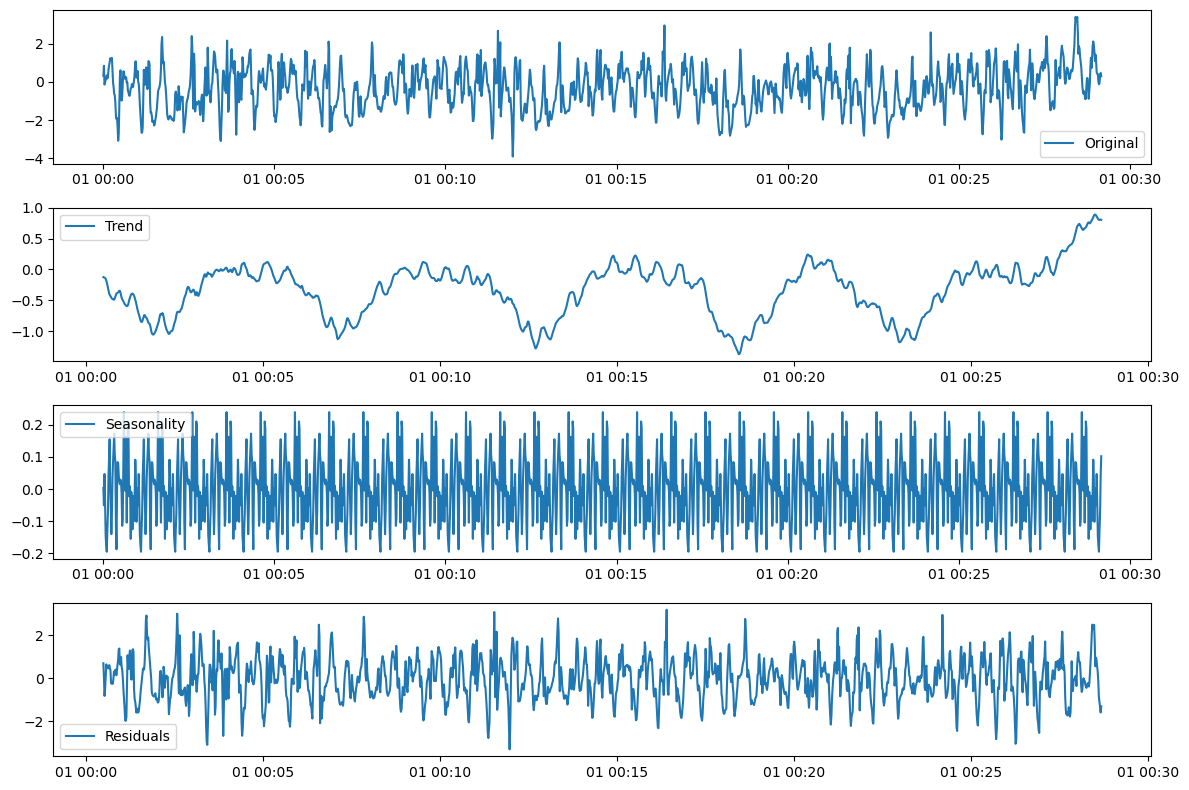

In [38]:
decomposition = seasonal_decompose(sensor['rotationRate.x'], model='additive', period=60)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sensor['rotationRate.x'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

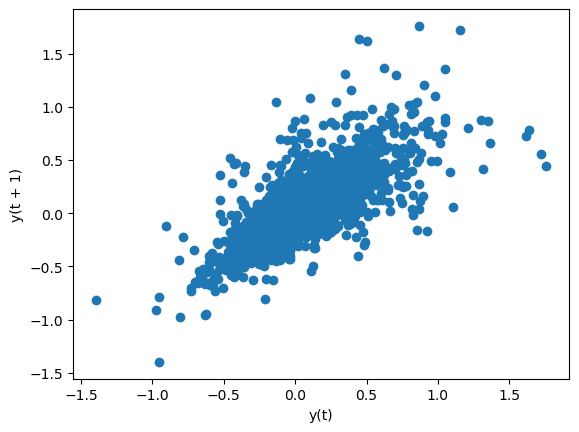

In [40]:
pd.plotting.lag_plot(sensor["userAcceleration.x"], lag=1)

Create a lag plot for `rotationRate.x`

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

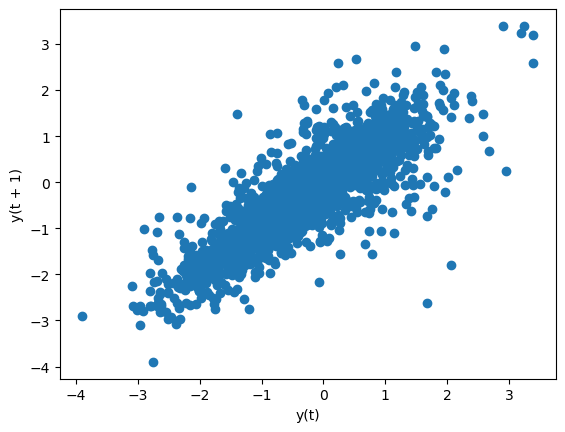

In [41]:
pd.plotting.lag_plot(sensor["rotationRate.x"], lag=1)

What are your conclusions from both visualizations?

In [49]:
""" There's a moderate linear relationship between the variables at time t and time t+1.
Since the points are widely spread and do not fully cluster along a diagonal line, it indicates that the autocorrelation at lag 1 may not be strong.
However, without a reference line or a correlation coefficient, we cannot definitively quantify the strength of the correlation. """

" There's a moderate linear relationship between the variables at time t and time t+1.\nSince the points are widely spread and do not cluster along a diagonal line, it indicates that the autocorrelation at lag 1 may not be strong.\nHowever, without a reference line or a correlation coefficient, we cannot definitively quantify the strength of the correlation. "

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [47]:
def dickey_rejects (series, alpha = 0.05):
    
    p_value = adfuller(series)[0]
    
    h0 = "The series is NOT stationary"
    h1 = "The series IS stationary"
    
    if p_value < alpha:
        return f"We reject H0 and accept H1: {h1}"
    
    elif p_value > alpha:
        return f"We don't have enough info to reject H0, so we keep H0: {h0}"

userAccelerationX = dickey_rejects(sensor["userAcceleration.x"])
rotationRateX = dickey_rejects(sensor["rotationRate.x"])
print(userAccelerationX, "\n", rotationRateX)

We reject H0 and accept H1: The series IS stationary 
 We reject H0 and accept H1: The series IS stationary


What are your conclusions from this test?

In [13]:
""" The statistical tests conducted have consistently demonstrated that the time series under examination exhibits stationarity.
This implies that its statistical properties, such as mean, variance, and autocorrelation, are constant over time.
Such a characteristic of stationarity is crucial for reliable time series modeling and forecasting, as many analytical methods assume or require the data to be stationary."""

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [94]:
order = (2, 0, 1)

In [95]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-11:]

In [96]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html
model = ARIMA(y_train, order = (2, 0, 1), freq="S")



c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


In [97]:
# 2. Fit the model:
model_fit = model.fit()

In [98]:
# 3. Predict: create y_pred:
y_pred = model_fit.predict(start=len(y_train), end= len(y_train)+10)

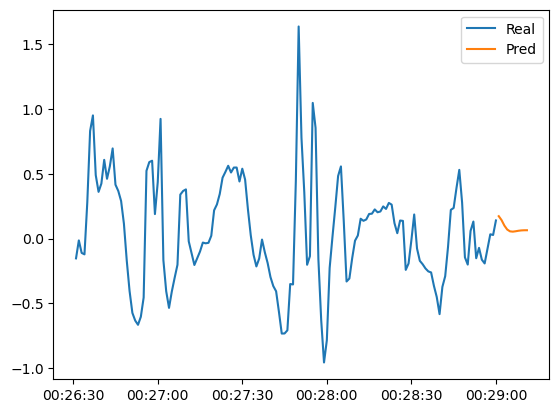

In [99]:
# 4. Visualize
plt.plot(y_train[-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend()

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [100]:
from statsmodels.tools.eval_measures import rmse
rmse(y_pred, y_test)

0.2085023469625489